In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

data = pd.read_csv('heart.csv')

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

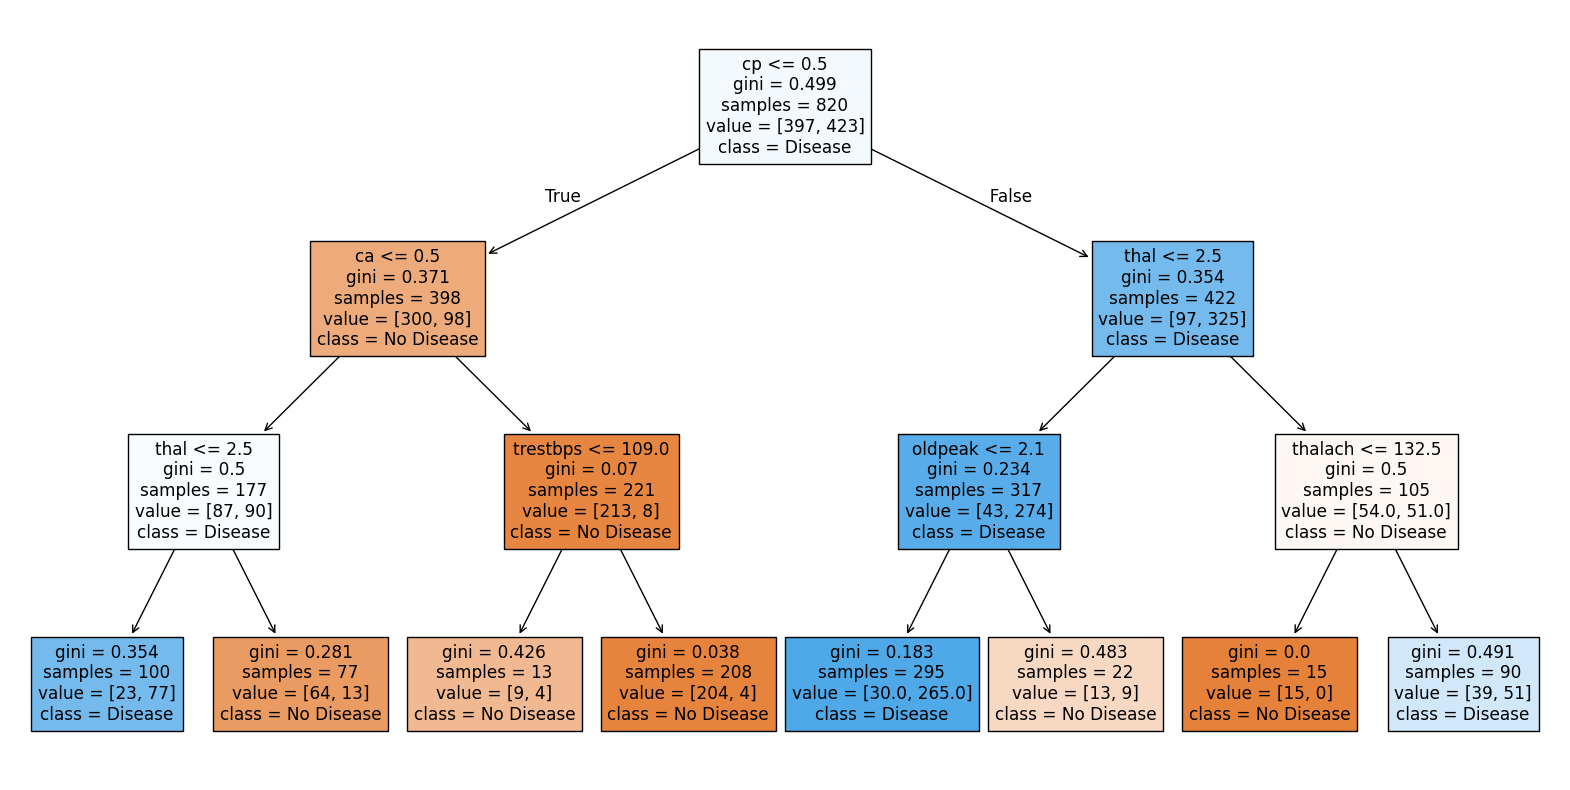

Pruned Tree - Training Accuracy: 0.85
Pruned Tree - Test Accuracy: 0.78


In [8]:
# 1. Decision Tree with limited depth
dt_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_pruned.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(dt_pruned, 
          feature_names=X.columns,
          class_names=['No Disease', 'Disease'],
          filled=True)
plt.show()

train_pred = dt_pruned.predict(X_train)
test_pred = dt_pruned.predict(X_test)
print(f"Pruned Tree - Training Accuracy: {accuracy_score(y_train, train_pred):.2f}")
print(f"Pruned Tree - Test Accuracy: {accuracy_score(y_test, test_pred):.2f}")

In [9]:
# 2. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)
print(f"\nRandom Forest - Training Accuracy: {accuracy_score(y_train, rf_train_pred):.2f}")
print(f"Random Forest - Test Accuracy: {accuracy_score(y_test, rf_test_pred):.2f}")


Random Forest - Training Accuracy: 1.00
Random Forest - Test Accuracy: 0.99


In [6]:
# 3. Feature Importance
importances = rf.feature_importances_
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
print("\nFeature Importances:")
print(feature_importance)


Feature Importances:
     Feature  Importance
2         cp    0.135072
11        ca    0.127327
7    thalach    0.122169
9    oldpeak    0.121905
12      thal    0.110518
0        age    0.077908
4       chol    0.074822
3   trestbps    0.071171
8      exang    0.057594
10     slope    0.045782
1        sex    0.028731
6    restecg    0.018557
5        fbs    0.008444


In [10]:
# 4. Cross-Validation
print("\nCross-Validation Scores:")
dt_scores = cross_val_score(dt_pruned, X, y, cv=5)
print(f"Decision Tree: {dt_scores.mean():.2f} (+/- {dt_scores.std():.2f})")

rf_scores = cross_val_score(rf, X, y, cv=5)
print(f"Random Forest: {rf_scores.mean():.2f} (+/- {rf_scores.std():.2f})")


Cross-Validation Scores:
Decision Tree: 0.83 (+/- 0.02)
Random Forest: 1.00 (+/- 0.01)
